# Intel Image Classification Methodology

1. Visualize dataset and understand baseline score
2. Organize data for models based off initial visualization
3. Sample dataset and make predictions
4. Create a baseline CNN and evaulation
5. Create an advanced CNN and evaluation

## Imports

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import cv2
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix

import os, os.path

np.random.seed(42)

## Initial Visualization

In [2]:
train = ('../data/seg_train/')
test = ('../data/seg_test/')
pred = ('../data/seg_pred/')

In [3]:
for folder in os.listdir(train):
    directory = train + f'{folder}/'
    files = next(os.walk(directory))[2]
    print(f'{folder} training: {len(files)} images')
    
#source: https://stackoverflow.com/questions/2632205/how-to-count-the-number-of-files-in-a-directory-using-python

buildings training: 2191 images
forest training: 2271 images
glacier training: 2404 images
mountain training: 2512 images
sea training: 2274 images
street training: 2382 images


In [4]:
for folder in os.listdir(test):
    directory = test + f'{folder}/'
    files = next(os.walk(directory))[2]
    print(f'{folder} testing size: {len(files)} images')
    
#source: https://stackoverflow.com/questions/2632205/how-to-count-the-number-of-files-in-a-directory-using-python

buildings testing size: 437 images
forest testing size: 474 images
glacier testing size: 553 images
mountain testing size: 525 images
sea testing size: 510 images
street testing size: 501 images


Baseline accuracy = 553 / (437 + 474 + 553 + 525 + 510 + 501) * 100 = 18.43%

In [5]:
files = next(os.walk(pred))[2]
print(f'prediction size: {len(files)} images')

#source: https://stackoverflow.com/questions/2632205/how-to-count-the-number-of-files-in-a-directory-using-python

prediction size: 7301 images


## Data Organization

In [6]:
classes = {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}
classes_rev = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}

In [7]:
# code inspired by: https://keras.io/examples/vision/image_classification_from_scratch/

def image_set(directory):
    images = []
    labels = []
        
    for folder in os.listdir(directory):
        label = classes_rev[folder]
        for file in os.listdir(directory + f'{folder}/'):
            
            image_path = directory + f'{folder}/{file}'
            
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #source: https://stackoverflow.com/questions/39316447/opencv-giving-wrong-color-to-colored-images-on-loading
            image = cv2.resize(image, (150,150)) 

            images.append(image)
            labels.append(label)

    return images, labels

In [8]:
X_train, y_train = image_set(train)
X_test, y_test = image_set(test)

In [9]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [10]:
X_train = X_train.astype('float32')

X_test = X_test.astype('float32')

In [11]:
X_train /= 255.0

X_test /= 255.0

In [12]:
X_train.shape

(14034, 150, 150, 3)

In [13]:
y_train.shape

(14034,)

## Dataset Visualization

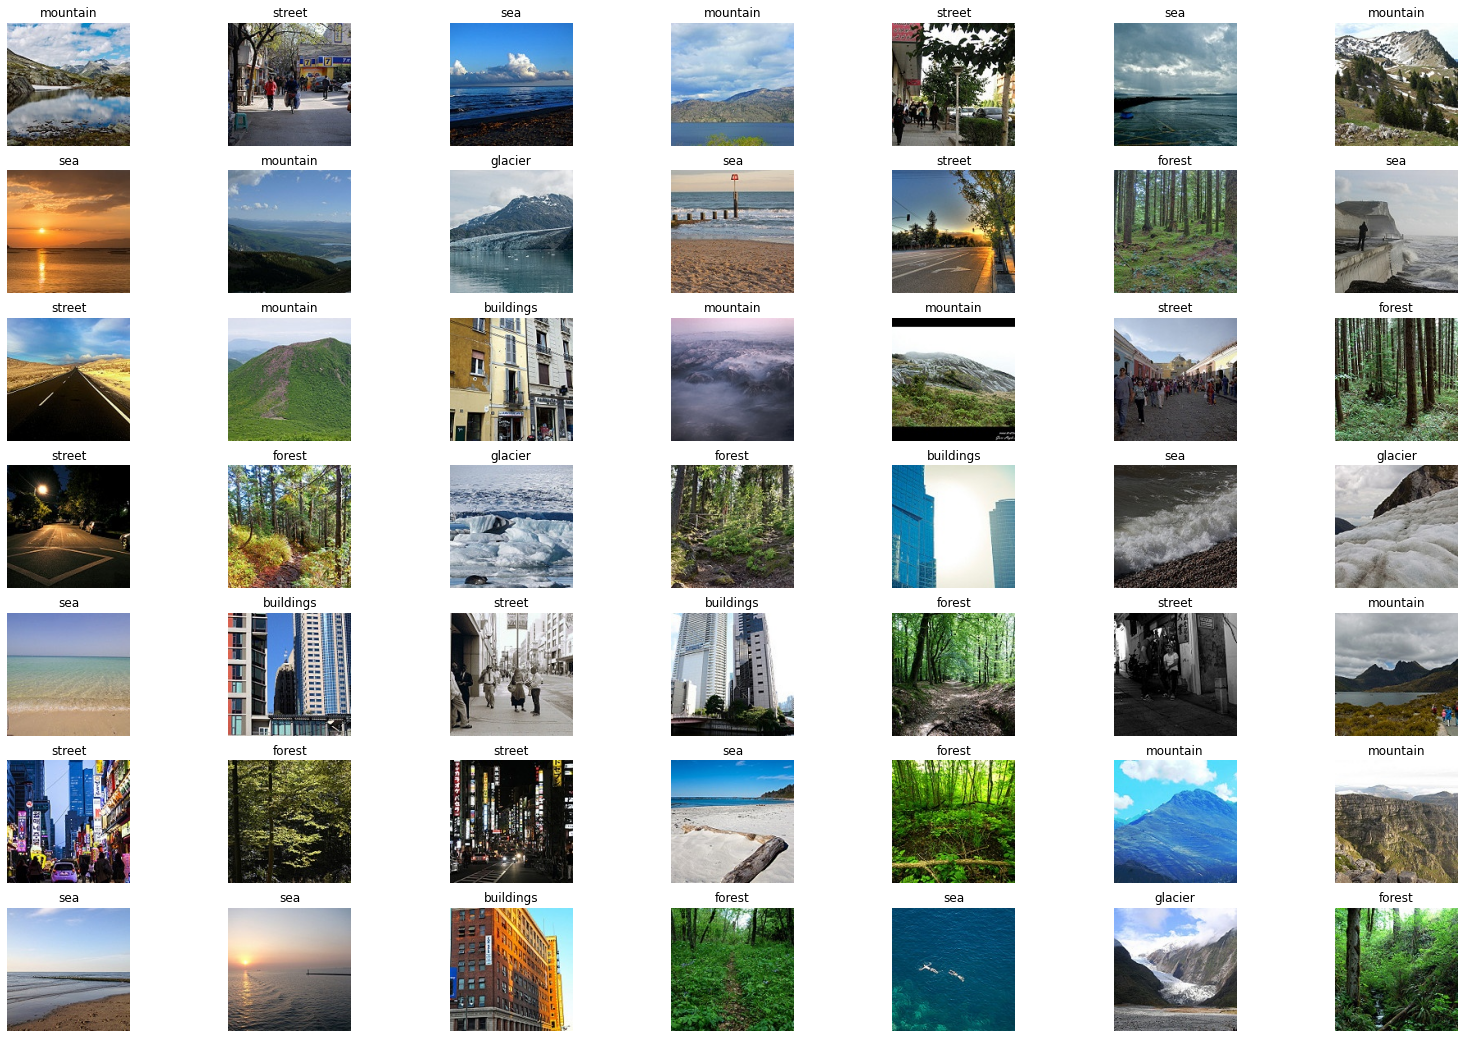

In [74]:
# code inspired by: https://keras.io/examples/vision/image_classification_from_scratch/

f, ax = plt.subplots(7, 7) 
f.subplots_adjust(1, 1, 4.5, 4.5)

for i in range(0, 7, 1):
    for j in range(0, 7, 1):
        image_number = random.randint(0, len(X_train))
        ax[i, j].imshow(X_train[image_number])
        ax[i, j].set_title(classes[y_train[image_number]])
        ax[i, j].axis('off')

## Baseline CNN Model

In [15]:
model = Sequential()

model.add(Flatten(input_shape = (150, 150, 3)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 8,644,586
Trainable params: 8,644,586
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', # each image belongs to one class exclusively
              optimizer = 'adam',
              metrics = ['accuracy'])

In [17]:
history = model.fit(X_train,
                    y_train, 
                    batch_size = 128,
                    validation_data = (X_test, y_test),
                    epochs = 40,
                    verbose = 1)

Epoch 1/40
110/110 [==============================] - 6s 47ms/step - loss: 3.8328 - accuracy: 0.3482 - val_loss: 1.6614 - val_accuracy: 0.4113
Epoch 2/40
110/110 [==============================] - 5s 46ms/step - loss: 1.5552 - accuracy: 0.4421 - val_loss: 1.4315 - val_accuracy: 0.4940
Epoch 3/40
110/110 [==============================] - 5s 47ms/step - loss: 1.5569 - accuracy: 0.4496 - val_loss: 2.1540 - val_accuracy: 0.3013
Epoch 4/40
110/110 [==============================] - 5s 47ms/step - loss: 1.5365 - accuracy: 0.4205 - val_loss: 1.7871 - val_accuracy: 0.4157
Epoch 5/40
110/110 [==============================] - 5s 47ms/step - loss: 1.3943 - accuracy: 0.4883 - val_loss: 1.4670 - val_accuracy: 0.5000
Epoch 6/40
110/110 [==============================] - 5s 47ms/step - loss: 1.3662 - accuracy: 0.4982 - val_loss: 1.4813 - val_accuracy: 0.4820
Epoch 7/40
110/110 [==============================] - 5s 47ms/step - loss: 1.4944 - accuracy: 0.4770 - val_loss: 1.4330 - val_accuracy: 0.4553

## Baseline Model Evaluation

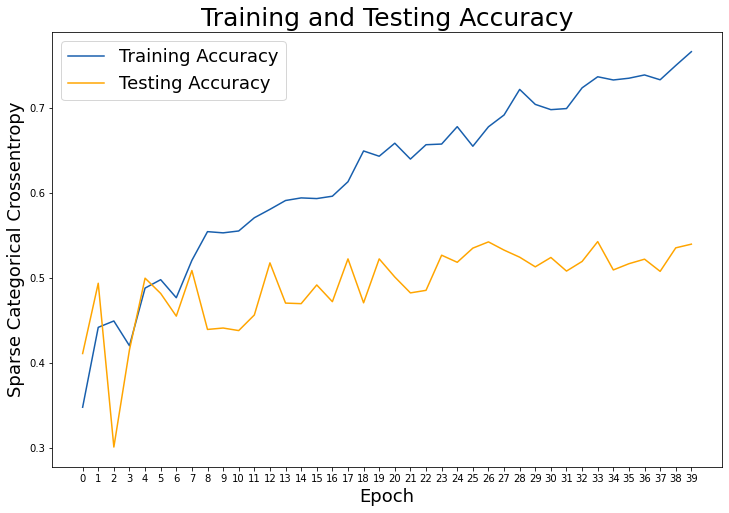

In [18]:
# source: lesson 7.05

train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epoch_labels = history.epoch

plt.figure(figsize=(12, 8))

plt.plot(train_acc, label='Training Accuracy', color='#185fad')
plt.plot(test_acc, label='Testing Accuracy', color='orange')

plt.title('Training and Testing Accuracy', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Sparse Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)  

plt.legend(fontsize=18);

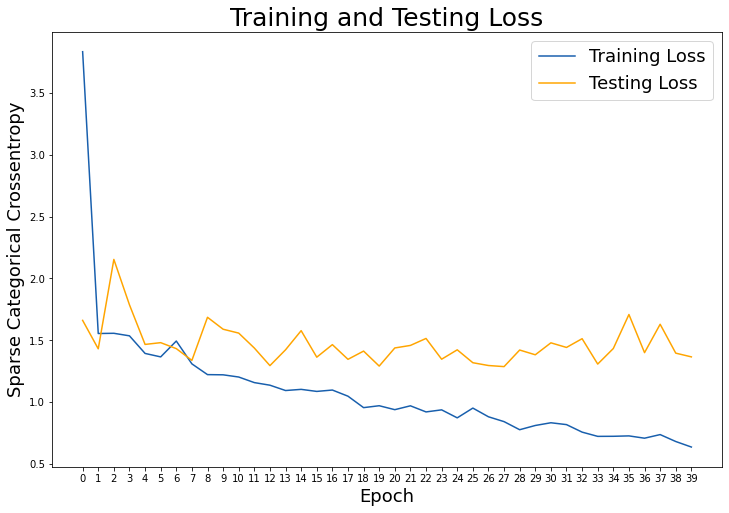

In [19]:
# source: lesson 7.05

train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

plt.figure(figsize=(12, 8))

plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

plt.title('Training and Testing Loss', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Sparse Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)   

plt.legend(fontsize=18);

In [22]:
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

labels = model.metrics_names

94/94 [==============================] - 1s 6ms/step - loss: 1.3664 - accuracy: 0.5400
loss: 1.3663926124572754
accuracy: 0.5400000214576721


In [29]:
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis = 1)

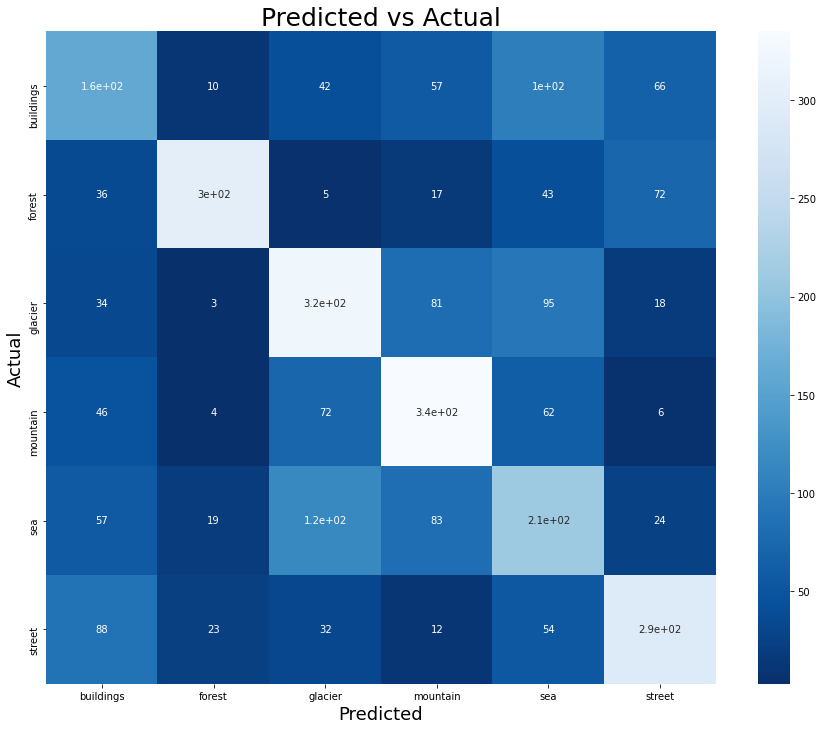

In [59]:
# source = https://stackoverflow.com/questions/67303001/plot-confusion-matrix-with-keras-data-generator-using-sklearn

conf = confusion_matrix(y_test, pred_labels)

plt.figure(figsize = (15, 12))
ax = plt.axes()
sn.heatmap(conf, annot = True, 
           xticklabels = list(classes_rev.keys()), 
           yticklabels = list(classes_rev.keys()), ax = ax,
           cmap = 'Blues_r')
ax.set_title('Predicted vs Actual', fontsize = 25)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)

plt.show()

In [66]:
correct = (y_test == pred_labels)
inc_images = X_test[np.where(correct == 0)]
inc_labels = pred_labels[np.where(correct == 0)]

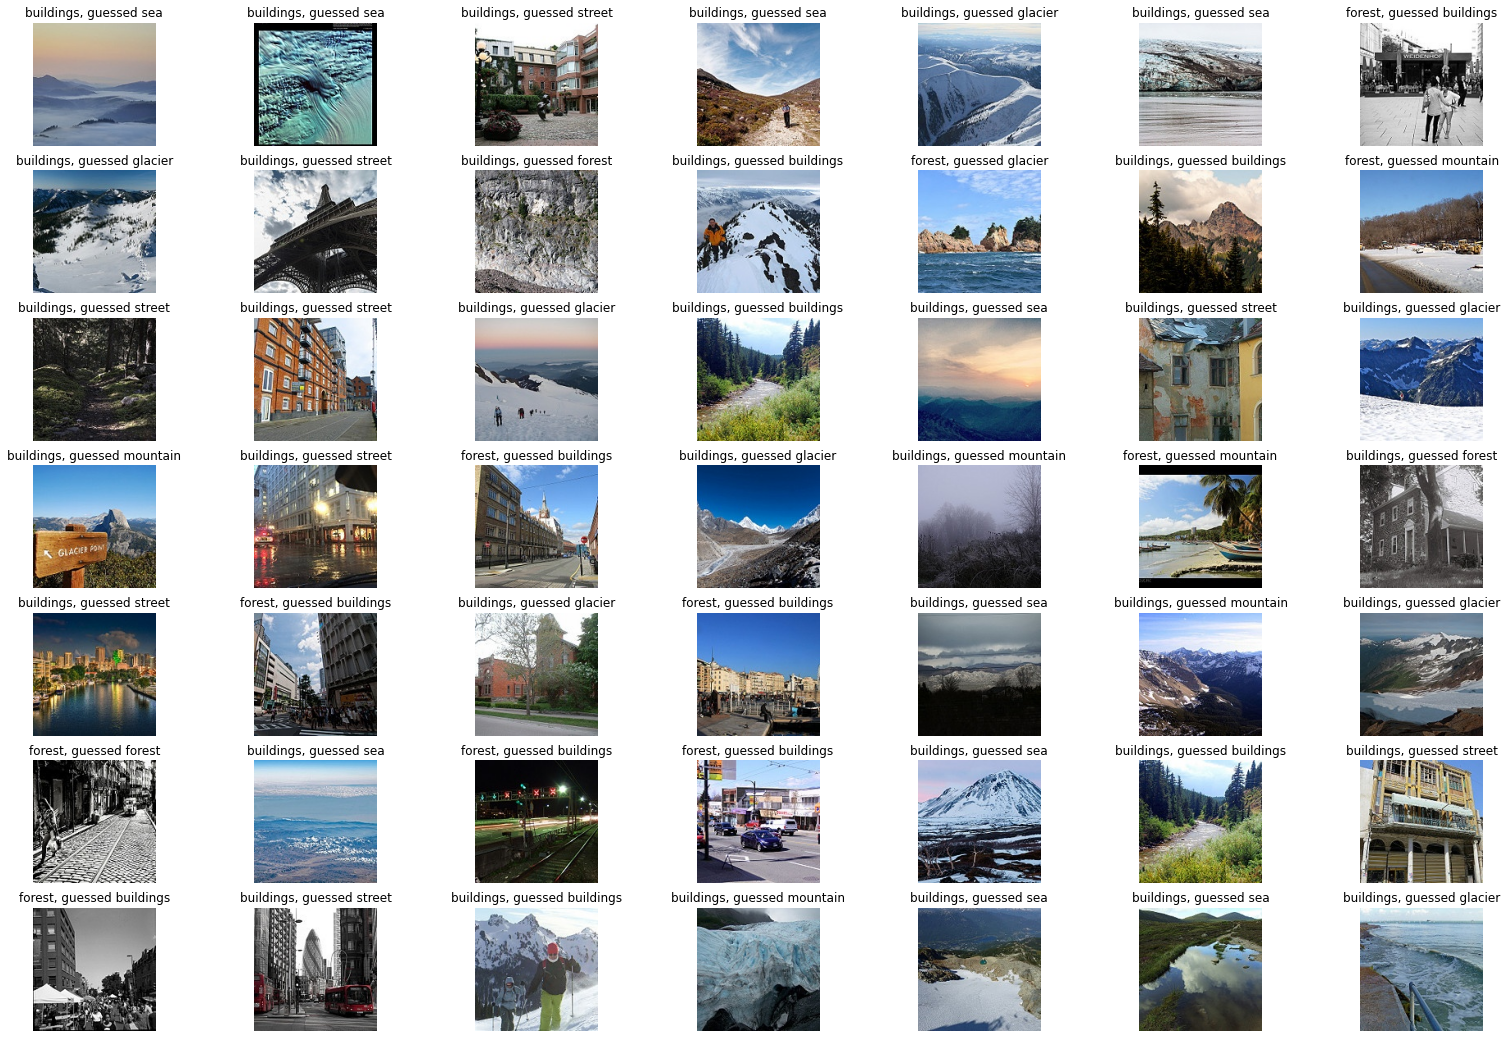

In [110]:
# code inspired by: https://keras.io/examples/vision/image_classification_from_scratch/

f, ax = plt.subplots(7, 7) 
f.subplots_adjust(1, 1, 4.5, 4.5)
for i in range(0, 7, 1):
    for j in range(0, 7, 1):
        image_number = random.randint(0, len(inc_images))
        ax[i, j].imshow(inc_images[image_number])
        ax[i, j].set_title(f'{classes[y_test[image_number]]}, guessed {classes[inc_labels[image_number]]}')
        ax[i, j].axis('off')

## Advanced CNN Model

In [79]:
model2 = Sequential()

model2.add(Conv2D(filters = 128, 
                     kernel_size = (3, 3), 
                     activation = 'relu', 
                     input_shape = (150, 150, 3)
                     ))                
model2.add(MaxPooling2D(pool_size = (3, 3)))
model2.add(Conv2D(filters = 64, 
                     kernel_size = (3, 3), 
                     activation = 'relu', 
                     ))                
model2.add(MaxPooling2D(pool_size = (3, 3)))
         
    
model2.add(Flatten(input_shape = (150, 150, 3)))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
  
    
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = 'softmax'))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 14400)             0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [80]:
model2.compile(loss = 'sparse_categorical_crossentropy', # each image belongs to one class exclusively
              optimizer = 'adam',
              metrics = ['accuracy'])

In [81]:
history = model2.fit(X_train,
                    y_train, 
                    batch_size = 128,
                    validation_data = (X_test, y_test),
                    epochs = 40,
                    verbose = 1)

Epoch 1/40
110/110 [==============================] - 256s 2s/step - loss: 1.4740 - accuracy: 0.3510 - val_loss: 1.0676 - val_accuracy: 0.5900
Epoch 2/40
110/110 [==============================] - 254s 2s/step - loss: 1.2359 - accuracy: 0.4798 - val_loss: 0.9524 - val_accuracy: 0.6313
Epoch 3/40
110/110 [==============================] - 251s 2s/step - loss: 1.1050 - accuracy: 0.5372 - val_loss: 0.8319 - val_accuracy: 0.6847
Epoch 4/40
110/110 [==============================] - 252s 2s/step - loss: 1.0384 - accuracy: 0.5641 - val_loss: 0.8225 - val_accuracy: 0.7083
Epoch 5/40
110/110 [==============================] - 252s 2s/step - loss: 0.9802 - accuracy: 0.5878 - val_loss: 0.7704 - val_accuracy: 0.7377
Epoch 6/40
110/110 [==============================] - 262s 2s/step - loss: 0.9455 - accuracy: 0.6070 - val_loss: 0.7028 - val_accuracy: 0.7483
Epoch 7/40
110/110 [==============================] - 258s 2s/step - loss: 0.9118 - accuracy: 0.6208 - val_loss: 0.7091 - val_accuracy: 0.7513

## Advanced Model Evaluation

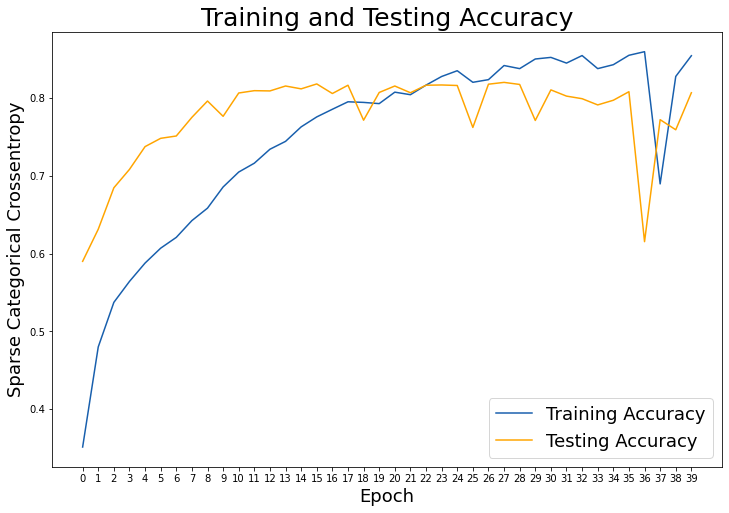

In [82]:
# source: lesson 7.05

train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epoch_labels = history.epoch

plt.figure(figsize=(12, 8))

plt.plot(train_acc, label='Training Accuracy', color='#185fad')
plt.plot(test_acc, label='Testing Accuracy', color='orange')

plt.title('Training and Testing Accuracy', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Sparse Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)  

plt.legend(fontsize=18);

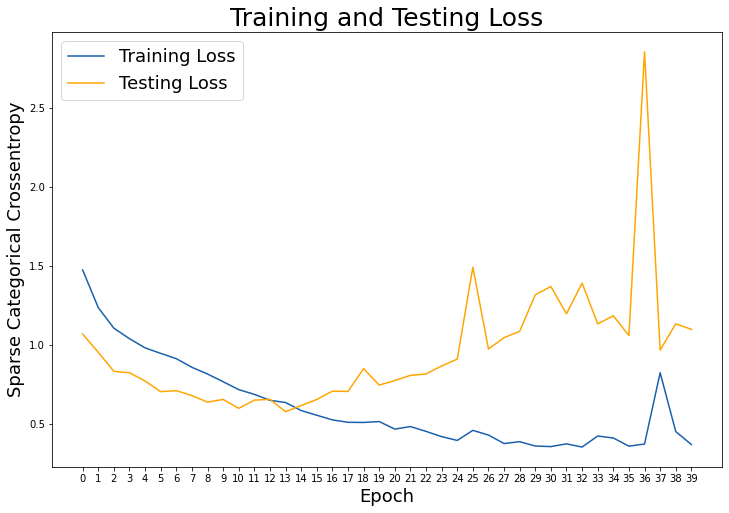

In [83]:
# source: lesson 7.05

train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

plt.figure(figsize=(12, 8))

plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

plt.title('Training and Testing Loss', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Sparse Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)   

plt.legend(fontsize=18);

In [84]:
score = model2.evaluate(X_test,
                       y_test,
                       verbose=1)

labels = model2.metrics_names

94/94 [==============================] - 11s 115ms/step - loss: 1.0974 - accuracy: 0.8070


In [86]:
predictions = model2.predict(X_test)
pred_labels = np.argmax(predictions, axis = 1)

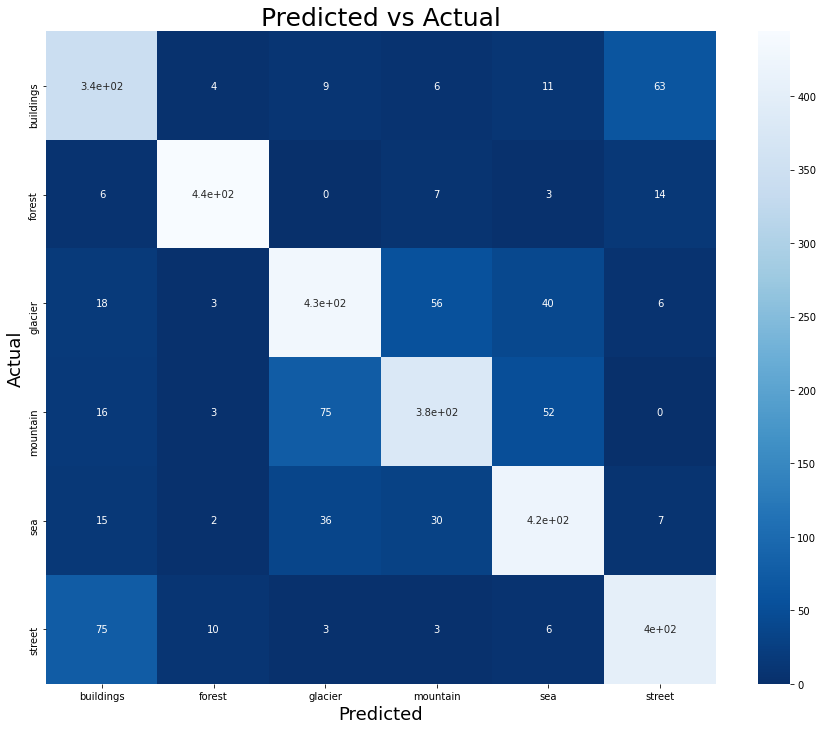

In [87]:
# source = https://stackoverflow.com/questions/67303001/plot-confusion-matrix-with-keras-data-generator-using-sklearn

conf = confusion_matrix(y_test, pred_labels)

plt.figure(figsize = (15, 12))
ax = plt.axes()
sn.heatmap(conf, annot = True, 
           xticklabels = list(classes_rev.keys()), 
           yticklabels = list(classes_rev.keys()), ax = ax,
           cmap = 'Blues_r')
ax.set_title('Predicted vs Actual', fontsize = 25)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)

plt.show()

In [105]:
correct = (y_test == pred_labels)
inc_images = X_test[np.where(correct == 0)]
inc_labels = pred_labels[np.where(correct == 0)]

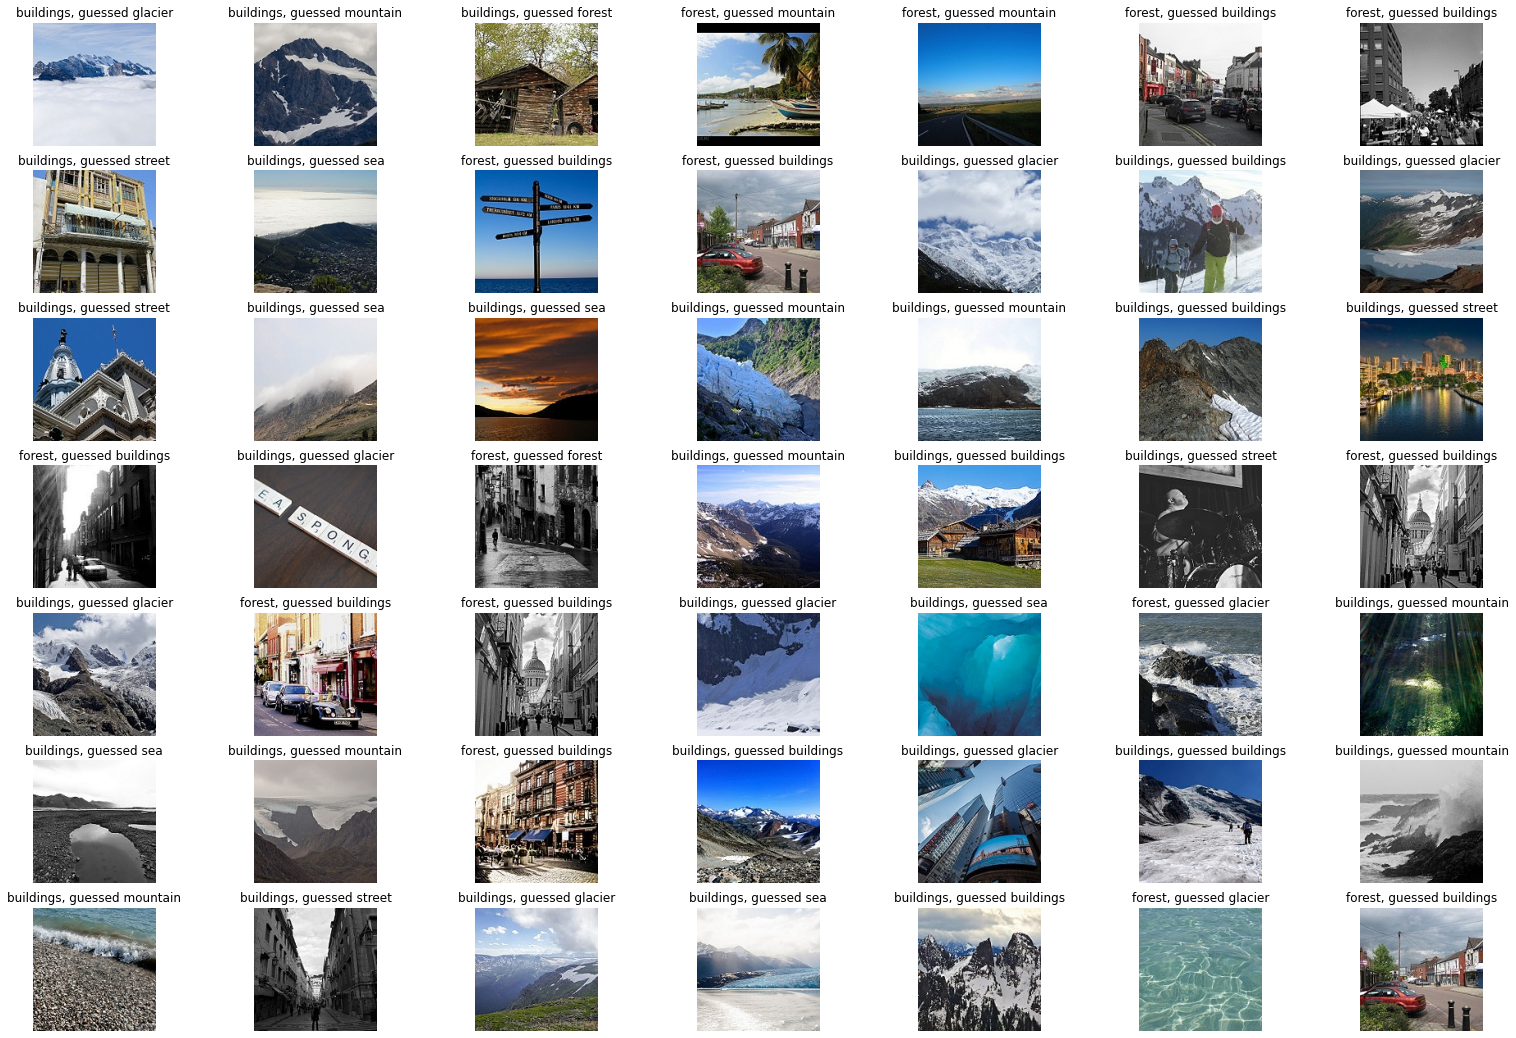

In [106]:
# code inspired by: https://keras.io/examples/vision/image_classification_from_scratch/

f, ax = plt.subplots(7, 7) 
f.subplots_adjust(1, 1, 4.5, 4.5)
for i in range(0, 7, 1):
    for j in range(0, 7, 1):
        image_number = random.randint(0, len(inc_images))
        ax[i, j].imshow(inc_images[image_number])
        ax[i, j].set_title(f'{classes[y_test[image_number]]}, guessed {classes[inc_labels[image_number]]}')
        ax[i, j].axis('off')